In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales=pd.read_csv('Sales Data.csv')

In [7]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [6]:
sales.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [8]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [11]:
sales['year']=sales['Order Date'].str.split('-').str[0]
sales['month']=sales['Order Date'].str.split('-').str[1]
sales['day']=sales['Order Date'].str.split('-').str[2]
sales['hour']=sales['Order Date'].str.split(':').str[0]

In [33]:
sales.drop(columns=['hour','minutes','seconds'],axis=1,inplace=True)

In [21]:
sales['day']=sales['Order Date'].str.split('-').str[2]

In [25]:
sales['day']=sales['day'].str.split(':').str[0]

In [27]:
sales['day']=sales['day'].str.split(' ').str[0]

In [37]:
sales['hour']=sales['Order Date'].str.split(' ').str[1].str.split(':').str[0]

In [41]:
sales['mins']=sales['Order Date'].str.split(' ').str[1].str.split(':').str[1]
sales['secs']=sales['Order Date'].str.split(' ').str[1].str.split(':').str[2]

In [51]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,City,year,month,day,hour,mins,secs
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",1700.00,New York City,2019,12,30,0,1,0
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",600.00,New York City,2019,12,29,7,3,0
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",11.95,New York City,2019,12,12,18,21,0
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",149.99,San Francisco,2019,12,22,15,13,0
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta,2019,12,18,12,38,0


In [45]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
 10  year              185950 non-null  int64  
 11  month             185950 non-null  int64  
 12  day               185950 non-null  int64  
 13  hour              185950 non-null  int64  
 14  mins              185950 non-null  int64  
 15  secs              185950 non-null  int64  
dtypes: float64(2), int64

In [44]:
change_text=['year','month','day','hour','mins','secs']
for i in change_text:
    sales[i]=sales[i].astype(int)

KeyError: "['Order Date'] not found in axis"

In [82]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,year,month,day,hour,mins,secs,home_address,City,pincode
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",1700.00,2019,12,30,0,1,0,136 Church St,New York City,10001
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",600.00,2019,12,29,7,3,0,562 2nd St,New York City,10001
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",11.95,2019,12,12,18,21,0,277 Main St,New York City,10001
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",149.99,2019,12,22,15,13,0,410 6th St,San Francisco,94016
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,18,12,38,0,43 Hill St,Atlanta,30301


In [74]:
sales.drop(columns=['house_no'],axis=1,inplace=True)

In [59]:
sales['house_no']=sales['Purchase Address'].str.split(' ').str[0]


In [69]:
sales['pincode']=sales['Purchase Address'].str.split(',').str[2].str.split(' ').str[2]

In [76]:
sales['home_address']=sales['Purchase Address'].str.split(',').str[0]

In [78]:
column_to_move = 'pincode'
sales = sales[[col for col in sales.columns if col != column_to_move] + [column_to_move]]

In [81]:
column_to_move = 'City'
columns = [col for col in sales.columns if col != column_to_move]

# Insert 'B' before the last column
new_position = len(columns) - 1
columns.insert(new_position, column_to_move)
sales=sales[columns]

In [83]:
df=sales.drop(columns='Purchase Address',axis=1)

In [84]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,year,month,day,hour,mins,secs,home_address,City,pincode
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019,12,30,0,1,0,136 Church St,New York City,10001
1,295666,LG Washing Machine,1,600.00,600.00,2019,12,29,7,3,0,562 2nd St,New York City,10001
2,295667,USB-C Charging Cable,1,11.95,11.95,2019,12,12,18,21,0,277 Main St,New York City,10001
3,295668,27in FHD Monitor,1,149.99,149.99,2019,12,22,15,13,0,410 6th St,San Francisco,94016
4,295669,USB-C Charging Cable,1,11.95,11.95,2019,12,18,12,38,0,43 Hill St,Atlanta,30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2.99,2019,6,7,19,2,0,795 Pine St,Boston,02215
185946,222906,27in FHD Monitor,1,149.99,149.99,2019,6,1,19,29,0,495 North St,New York City,10001
185947,222907,USB-C Charging Cable,1,11.95,11.95,2019,6,22,18,57,0,319 Ridge St,San Francisco,94016
185948,222908,USB-C Charging Cable,1,11.95,11.95,2019,6,26,18,35,0,916 Main St,San Francisco,94016


In [107]:
df.to_csv('Cleaned Sales Data.csv',index=False)

In [86]:
df.shape

(185950, 14)

In [87]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,year,month,day,hour,mins,secs,home_address,City,pincode
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019,12,30,0,1,0,136 Church St,New York City,10001
1,295666,LG Washing Machine,1,600.00,600.00,2019,12,29,7,3,0,562 2nd St,New York City,10001
2,295667,USB-C Charging Cable,1,11.95,11.95,2019,12,12,18,21,0,277 Main St,New York City,10001
3,295668,27in FHD Monitor,1,149.99,149.99,2019,12,22,15,13,0,410 6th St,San Francisco,94016
4,295669,USB-C Charging Cable,1,11.95,11.95,2019,12,18,12,38,0,43 Hill St,Atlanta,30301


In [88]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Sales,year,month,day,hour,mins,secs,home_address,City,pincode
185945,222905,AAA Batteries (4-pack),1,2.99,2.99,2019,6,7,19,2,0,795 Pine St,Boston,02215
185946,222906,27in FHD Monitor,1,149.99,149.99,2019,6,1,19,29,0,495 North St,New York City,10001
185947,222907,USB-C Charging Cable,1,11.95,11.95,2019,6,22,18,57,0,319 Ridge St,San Francisco,94016
185948,222908,USB-C Charging Cable,1,11.95,11.95,2019,6,26,18,35,0,916 Main St,San Francisco,94016
185949,222909,AAA Batteries (4-pack),1,2.99,2.99,2019,6,25,14,33,0,209 11th St,Atlanta,30301


In [89]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Sales               float64
year                  int64
month                 int64
day                   int64
hour                  int64
mins                  int64
secs                  int64
home_address         object
City                 object
pincode              object
dtype: object

In [91]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Sales,year,month,day,hour,mins,secs
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.0
mean,230417.569379,1.124383,184.399735,185.490917,2019.000183,7.059140,15.759532,14.413305,29.481361,0.0
std,51512.737110,0.442793,332.731330,332.919771,0.013521,3.502996,8.782176,5.423416,17.317573,0.0
min,141234.000000,1.000000,2.990000,2.990000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,185831.250000,1.000000,11.950000,11.950000,2019.000000,4.000000,8.000000,11.000000,14.000000,0.0
50%,230367.500000,1.000000,14.950000,14.950000,2019.000000,7.000000,16.000000,15.000000,29.000000,0.0
75%,275035.750000,1.000000,150.000000,150.000000,2019.000000,10.000000,23.000000,19.000000,45.000000,0.0
max,319670.000000,9.000000,1700.000000,3400.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,0.0


In [100]:
df['Order ID'].duplicated().sum()

7513

In [106]:
df['Order ID'][df['Order ID'].duplicated()]

Series([], Name: Order ID, dtype: int64)

In [105]:
df=df.drop_duplicates(subset=['Order ID'],keep='first')

In [108]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,year,month,day,hour,mins,secs,home_address,City,pincode
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019,12,30,0,1,0,136 Church St,New York City,10001
1,295666,LG Washing Machine,1,600.00,600.00,2019,12,29,7,3,0,562 2nd St,New York City,10001
2,295667,USB-C Charging Cable,1,11.95,11.95,2019,12,12,18,21,0,277 Main St,New York City,10001
3,295668,27in FHD Monitor,1,149.99,149.99,2019,12,22,15,13,0,410 6th St,San Francisco,94016
4,295669,USB-C Charging Cable,1,11.95,11.95,2019,12,18,12,38,0,43 Hill St,Atlanta,30301


In [109]:
df.shape

(178437, 14)

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

In [ ]:
print(f"We have {format(len(numerical_features))} numerical features: {numerical_features}")
print(f"We have {format(len(categorical_features))} categorical features: {categorical_features}")

We have 10 numerical features: ['Order ID', 'Quantity Ordered', 'Price Each', 'Sales', 'year', 'month', 'day', 'hour', 'mins', 'secs']
We have 4 categorical features: ['Product', 'home_address', 'City', 'pincode']


/var/folders/rx/rh0pw2rd5j1_2rbk78s2ddrr0000gn/T/ipykernel_4457/3862886000.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True,color='r')
/var/folders/rx/rh0pw2rd5j1_2rbk78s2ddrr0000gn/T/ipykernel_4457/3862886000.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True,color='r')
/var/folders/rx/rh0pw2rd5j1_2rbk78s2ddrr0000gn/T/ipykernel_4457/3862886000.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True,color='r')
/var/folders/rx/rh0pw2rd5j1_2rbk78s2ddrr0000gn/T/ipykernel_4457/3862886000.py:6: FutureWarning: 


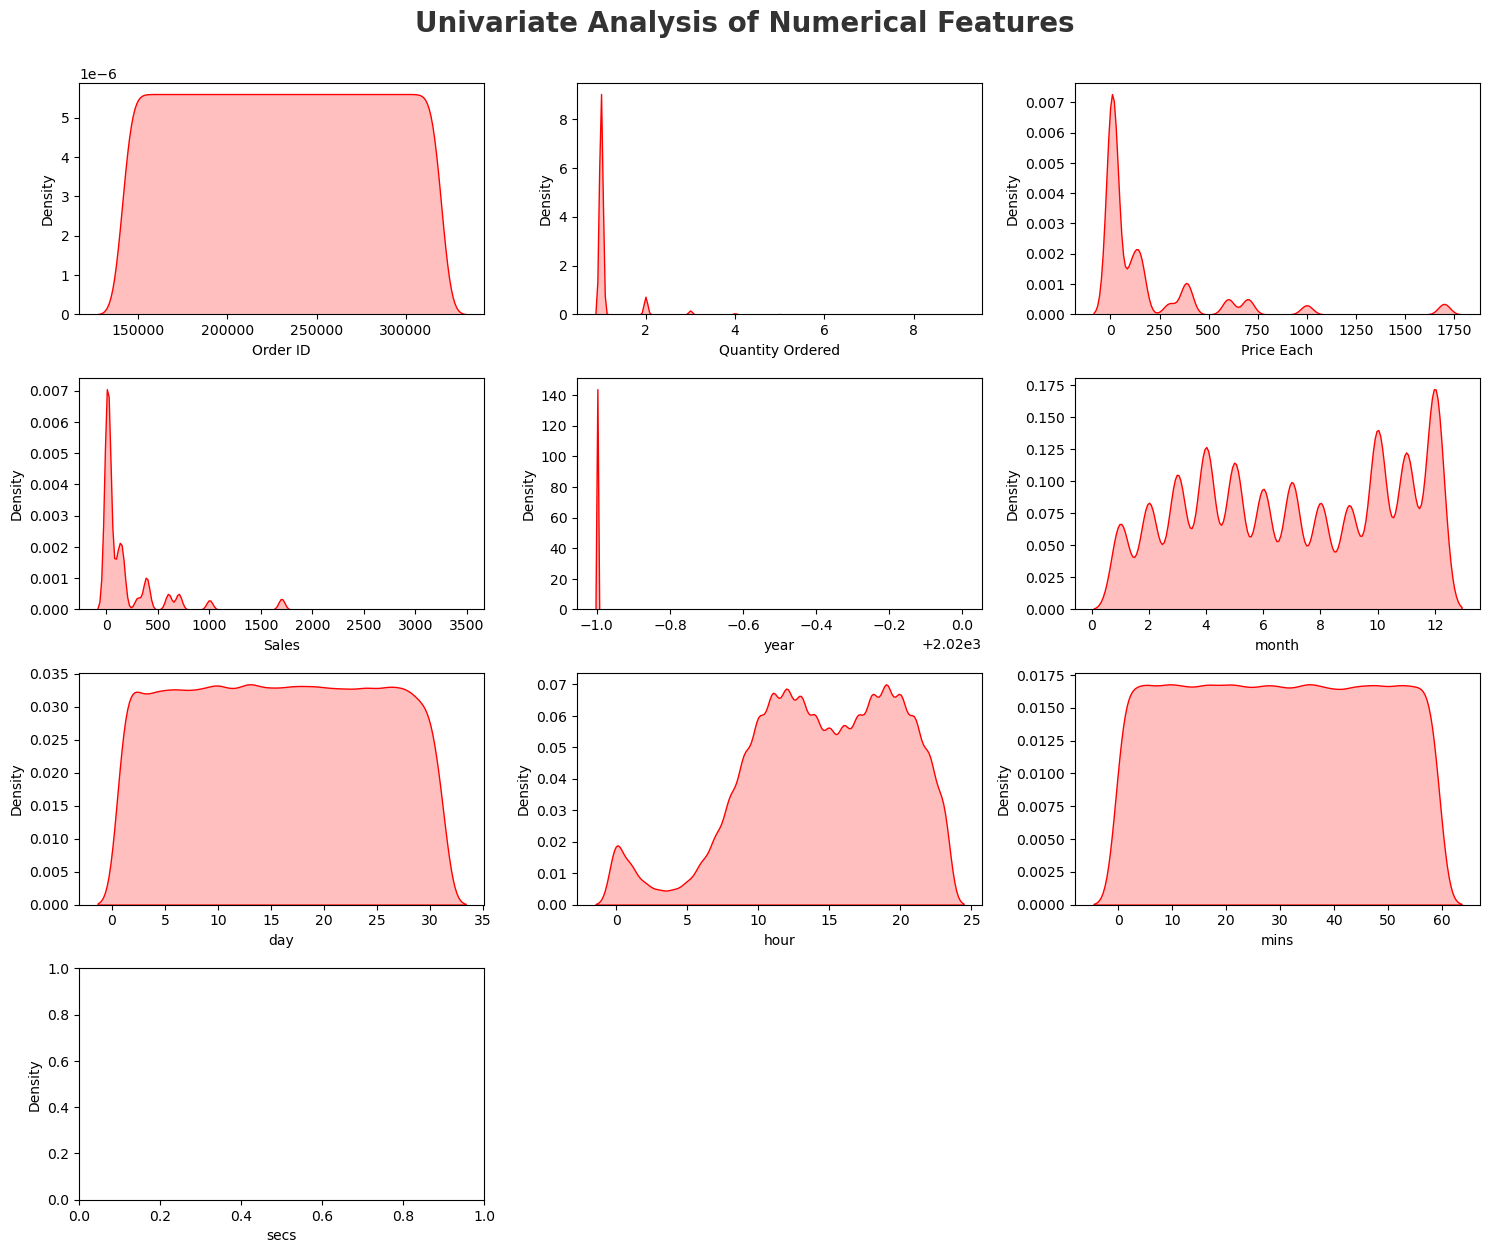

In [117]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True,color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [119]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

KeyError: 'Category'

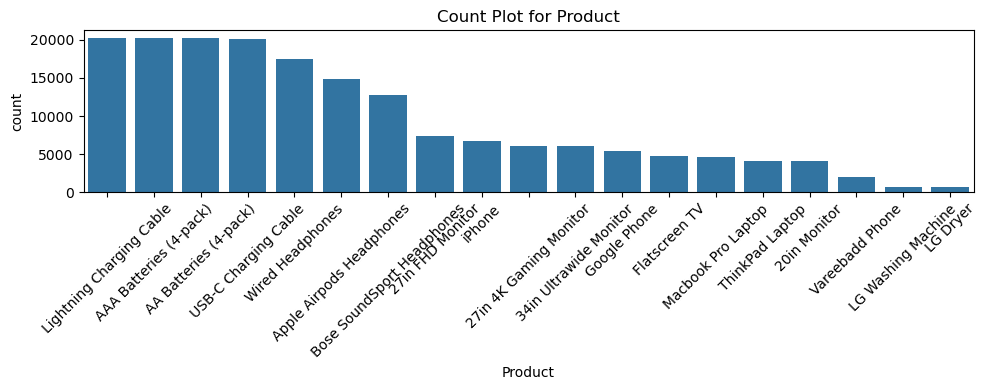

KeyboardInterrupt: 

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()